In [1]:
import requests
import pandas
from dateutil import parser
import json
host = 'http://18.188.56.207:9200/'
requests.get(host + '_cat/indices/enron').content

b'yellow open enron KDA5x2AfTSa6Zx-NYVFc3w 1 1 251734 0 543.4mb 543.4mb\n'

In [2]:
def elasticsearch_results_to_df(results):
    '''
    A function that will take the results of a requests.get 
    call to Elasticsearch and return a pandas.DataFrame object 
    with the results 
    '''
    hits = results.json()['hits']['hits']
    data = pandas.DataFrame([i['_source'] for i in hits], index = [i['_id'] for i in hits])
    data['date'] = data['date'].apply(parser.parse)
    return(data)

def print_df_row(row):
    '''
    A function that will take a row of the data frame and print it out
    '''
    print('____________________')
    print('RE: %s' % row.get('subject',''))
    print('At: %s' % row.get('date',''))
    print('From: %s' % row.get('sender',''))
    print('To: %s' % row.get('recipients',''))
    print('CC: %s' % row.get('cc',''))
    print('BCC: %s' % row.get('bcc',''))
    print('Body:\n%s' % row.get('text',''))
    print('____________________')

In [3]:
# Query For a full text match in the "text" field
# Uses the "match" query: https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-match-query.html
#https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html
doc = {
    "query": {
        "query_string": {
            #"query": "text: (Blockbuster AND Accounting AND Fraud)"
            "query": "sender: andrew.fastow* AND text: LJM"
            #"query": "(text: (LJM AND fastow))"            
        }        
    },
    "from" : 0, # Starting message to return. 
    "size" : 2000, # Return this many messages. Can't be more than 10,000
}
r=requests.get(host + 'enron/_search',
               data=json.dumps(doc), headers={'Content-Type':'application/json'})
r.raise_for_status()
print("Found %s messages matching the query, of " % r.json()['hits']['total'])
df = elasticsearch_results_to_df(r)
#print(df.head())
print("Returned %s messages" % df.shape[0])
print_df_row(df.iloc[0])


Found {'value': 1, 'relation': 'eq'} messages matching the query, of 
Returned 1 messages
____________________
RE: FW: Monday Meeting
At: 2001-04-16 19:25:00+00:00
From: andrew.fastow@enron.com
To: jeff.skilling@enron.com
CC: 
BCC: 
Body:
Jeff:

I'm sure this is just a "misunderstanding", but I know that UBS Capital has spent innumerable hours with management.  While Mark says that he doesn't want LJM to have an advantage, it looks like LJM is being put at a disadvantage.  You would think that Cliff and Mark would welcome a new bidder with open arms after failing to sell this business for 2+ years.  Until this is resolved, I'll assume that LJM is out of the bidding and will not do any further work.  Enron is back to one bidder (the lower one) -- better for our company ???

Andy
 -----Original Message-----
From: 	Umanoff, Adam  
Sent:	Monday, April 16, 2001 1:58 AM
To:	Fastow, Andrew S.
Subject:	Monday Meeting

Andy - Mark Metts called tonight and has asked me not to meet with you in Ho

In [4]:
# Query For a full text match in the "text" field
# Uses the "match" query: https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-match-query.html
#https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html
doc = {
    "query": {
        "query_string": {
            "query": "(text: (LJM AND fastow))"            
        }        
    },
    "from" : 0, # Starting message to return. 
    "size" : 2000, # Return this many messages. Can't be more than 10,000
}
r=requests.get(host + 'enron/_search',
               data=json.dumps(doc), headers={'Content-Type':'application/json'})
r.raise_for_status()
print("Found %s messages matching the query, of " % r.json()['hits']['total'])
df = elasticsearch_results_to_df(r)
print("Returned %s messages" % df.shape[0])
print_df_row(df.iloc[0])

Found {'value': 113, 'relation': 'eq'} messages matching the query, of 
Returned 113 messages
____________________
RE: FW: Erroneous press
At: 2001-10-26 23:53:11+00:00
From: pr <.palmer@enron.com>
To: james.derrick@enron.com
CC: nan
BCC: nan
Body:

fyi
 -----Original Message-----
From: 	Watkins, Sherron  
Sent:	Thursday, October 25, 2001 11:30 AM
To:	Koenig, Mark; Palmer, Mark A. (PR)
Cc:	McMahon, Jeffrey
Subject:	Erroneous press

Mark, I'm sure you are aware of the comments in the press that I have copied and inserted here below.  There have been others that are similar.  Basically, the press is reporting that we have dissolved the LJM partnerships, ended all relationships with the LJM entities, etc.  All that we have done is unwind the raptor entities, LJM still exists, all other transactions with LJM still exist, it's just that Andy sold his interest in the partnerships.  Michael Kopper owns them and would probably be considered a "friend of Enron" by investors/journalists.

I'm co

In [5]:
############################################## Strategy-1 ################################################################################
# Find emails from the know list of Enron employees convicted(referred as person of interest(POI)). Extract email body, 
#tokenize it to words, clean-up and plot wordcloud to discover any intereseting keywords that can then be used to enhance the search query
# and further refine the search results. Repeat this process as many times as required futher refining the search results and ultimately
# finding the wrongdoing email
##########################################################################################################################################
# Query For a full text match in the "text" field
# Uses the "match" query: https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-match-query.html
#https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html
doc = {
    "query": {
        "query_string": {
            "query": "(sender: *fastow* OR recipients: *fastow*)"            
            #"query": "(sender: *fastow*)"            
        }        
    },
    "from" : 0, # Starting message to return. 
    "size" : 2000, # Return this many messages. Can't be more than 10,000
}
r=requests.get(host + 'enron/_search',
               data=json.dumps(doc), headers={'Content-Type':'application/json'})
r.raise_for_status()
print("Found %s messages matching the query, of " % r.json()['hits']['total'])
df = elasticsearch_results_to_df(r)
#print(df.head())
print("Returned %s messages" % df.shape[0])
#print_df_row(df.iloc[0])

Found {'value': 348, 'relation': 'eq'} messages matching the query, of 
Returned 348 messages


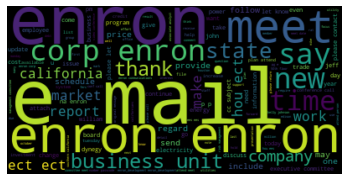

In [6]:
#Extract all the words from the emails an plot word cloud to discover new keywords to further refine the search query
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def preprocess(textStr):
    textStr = textStr.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(textStr)
    #Remove Stopwords
    tokens_no_stopwords = [w for w in tokens if not w in stopwords.words('english')]
    #lemmatize
    lem = WordNetLemmatizer()
    tokens_lemmatized = []
    for w in tokens_no_stopwords:
        tokens_lemmatized.append(lem.lemmatize(w, "v"))
    return tokens_lemmatized

def tokenizeemails(emails):
    all_words = []
    for text in emails:
        all_words.extend(preprocess(text))
    return all_words
filtered_words = tokenizeemails(df.get('text'))
#print("Filterd Words:",filtered_words)
#all_words_freq_dist = nltk.FreqDist(filtered_words)
#print(all_words_freq_dist.most_common(15))

import matplotlib.pyplot as plt 
from wordcloud import WordCloud

#create a single string from list
send_list=' '.join(filtered_words)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(send_list)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
############################################## Strategy-2 ################################################################################
# Find emails from the know list of Enron employees convicted(referred as person of interest(POI)). Perform sentiment analysis on tge email
# body and calculate polarity score. Sort the search results by the negative polarity scores. Go through the email to find the wrongdoing
# email
# sample polarity score - {'neg': 0.091, 'neu': 0.745, 'pos': 0.165, 'compound': 0.967}
# compound ranges from -1 to 1. negative <0, positive sentiment > 0
##########################################################################################################################################
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def calculatePolarityScoreAndSortByNegativeSentiment(emails):
    polarity_score = []
    polarity_score_pos = []
    polarity_score_neg = []
    polarity_score_neu = []
    polarity_score_compound = []
    for text in emails.get('text'):
        ps = sia.polarity_scores(text)
        polarity_score.append(ps)
        polarity_score_pos.append(ps.get('pos'))
        polarity_score_neg.append(ps.get('neg'))
        polarity_score_neu.append(ps.get('neu'))
        polarity_score_compound.append(ps.get('compound'))
    df['polarity_score'] = polarity_score
    df['polarity_score_pos'] = polarity_score_pos
    df['polarity_score_neg'] = polarity_score_neg
    df['polarity_score_neu'] = polarity_score_neu
    df['polarity_score_compound'] = polarity_score_compound
    sorted_df = df.sort_values(by='polarity_score_compound')
    return sorted_df

In [8]:
doc = {
    "query": {
        "query_string": {
            #"query": "(sender: *fastow* OR recipients: *fastow*) AND (text: Raptor OR text: LJM OR text: Chewco)"
            "query": "(sender: *fastow* OR recipients: *fastow*) AND (text: Global Galactic agreement)"
            #"query": "text: LJM"
        }        
    },
    "from" : 0, # Starting message to return. 
    "size" : 2000, # Return this many messages. Can't be more than 10,000
}
r=requests.get(host + 'enron/_search',
               data=json.dumps(doc), headers={'Content-Type':'application/json'})
r.raise_for_status()
print("Found %s messages matching the query, of " % r.json()['hits']['total'])
df = elasticsearch_results_to_df(r)
print("Returned %s messages" % df.shape[1])

emailWithPolarityScore = calculatePolarityScoreAndSortByNegativeSentiment(df)
#print(emailWithPolarityScore.head())


Found {'value': 30, 'relation': 'eq'} messages matching the query, of 
Returned 7 messages


In [10]:
print_df_row(emailWithPolarityScore.iloc[1])

____________________
RE: GMM 22 June 01
At: 2001-06-25 16:50:24+00:00
From: maureen.raymond@enron.com
To: william.smith@enron.com  sarah.wooddy@enron.com  brenda.aggar@enron.com  alhamd.alkhayat@enron.com  john.allario@enron.com  gunta.andrews@enron.com  martina.angelova@enron.com  aaron.armstrong@enron.com  harry.arora@enron.com  charles.baker@enron.com  andrew.baldock@enron.com  angie.barwick@enron.com  sally.beck@enron.com  chris.bellinger-smith@enron.com  j.beyer@enron.com  cheryl.borg@enron.com  emily.boxall@enron.com  clara.carrington@enron.com  howard.carter@enron.com  hazel.chawapiwa@enron.com  alistair.coleman@enron.com  faye.collis@enron.com  clare.cook@enron.com  andrew.cornfield@enron.com  dennis.cracknell@enron.com  analissa.croker@enron.com  jo.cronin@enron.com  ed.dablin@enron.com  shane.dallmann@enron.com  andrew.davis@enron.com  esther.demetz@enron.com  p..dupre@enron.com  bucky.dusek@enron.com  vikas.dwivedi@enron.com  michael.farmer@enron.com  suzanne.ferlic@enron.co